<a href="https://colab.research.google.com/github/praveensalmani15/Image-Classification-using-CNN/blob/main/Image_Classification_using_CNN's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Image Classification using CNN**

In [1]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2024-11-08 06:47:21--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873 [following]
--2024-11-08 06:47:22--  https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf6ffd7e56884b27ab44314f3fa.dl.dropboxusercontent.com/cd/0/inline/Cd_uE4wv4e95KnOklLltlDG6Fo6NcO4yZMs37gtp6uJp4O-NyHu7I63i6BHVuEY4o-l54nlAWAP0IAgYZ9K1hmx9Ne-DgXD9v7o5XflSD5-3oikydvr_eaz8s7q8UJI1LdcGngQCVY_vIkclOZ_VJpKO/file# [following]
--2024-11-08 06:47:24--  https://ucf6ffd7e56884b27ab44314f3fa.dl.dropboxusercontent.com/c

#### **Unzipping the compressed dataset**

In [2]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

##### Printing a sample image of a cat

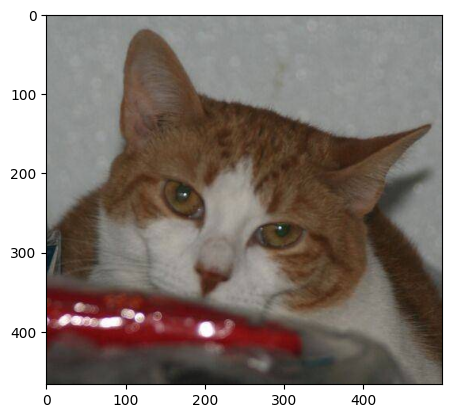

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as npimg
img=npimg.imread('/content/training_set/training_set/cats/cat.1083.jpg')
imgplot=plt.imshow(img)
plt.show()

##### Printing sample image of Dog

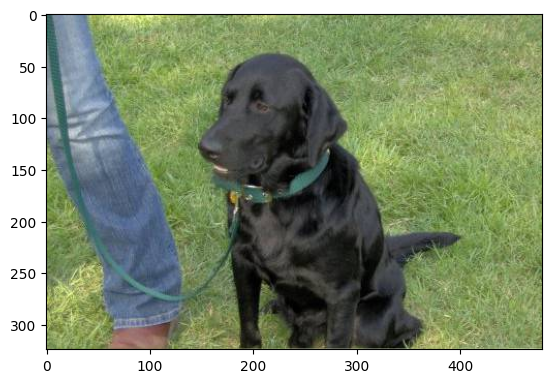

In [4]:
img=npimg.imread('/content/training_set/training_set/dogs/dog.1085.jpg')
imgplot=plt.imshow(img)
plt.show()

##### **Importing the requried libraries**

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [6]:
print(tf.__version__)

2.17.0


##### **Initializing the Parameters**

In [7]:
img_width,img_height=150,150
train_data_dir='/content/training_set/training_set'
validation_data_dir='/content/test_set/test_set'
nb_train_samples=100
nb_validation_samples=100
epochs=20
batch_size=20

##### **Checking the Shapes of the Images**

Image data is represented in a 2D array:**[rows][cols][channels]** in a channel last representation. Channels are the first dimension in channel first representation. 150
*150
*3

In [8]:
 import tensorflow.keras.backend as k
 if k.image_data_format()=='channels_first':
  input_shape=(3,img_width,img_height)
 else:
  input_shape=(img_width,img_height,3)


#### **Image generation to train the model**

In [9]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255) # Bringing the RGB values from 0-255 range
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


#### **Representation of ImageDataGenerator**

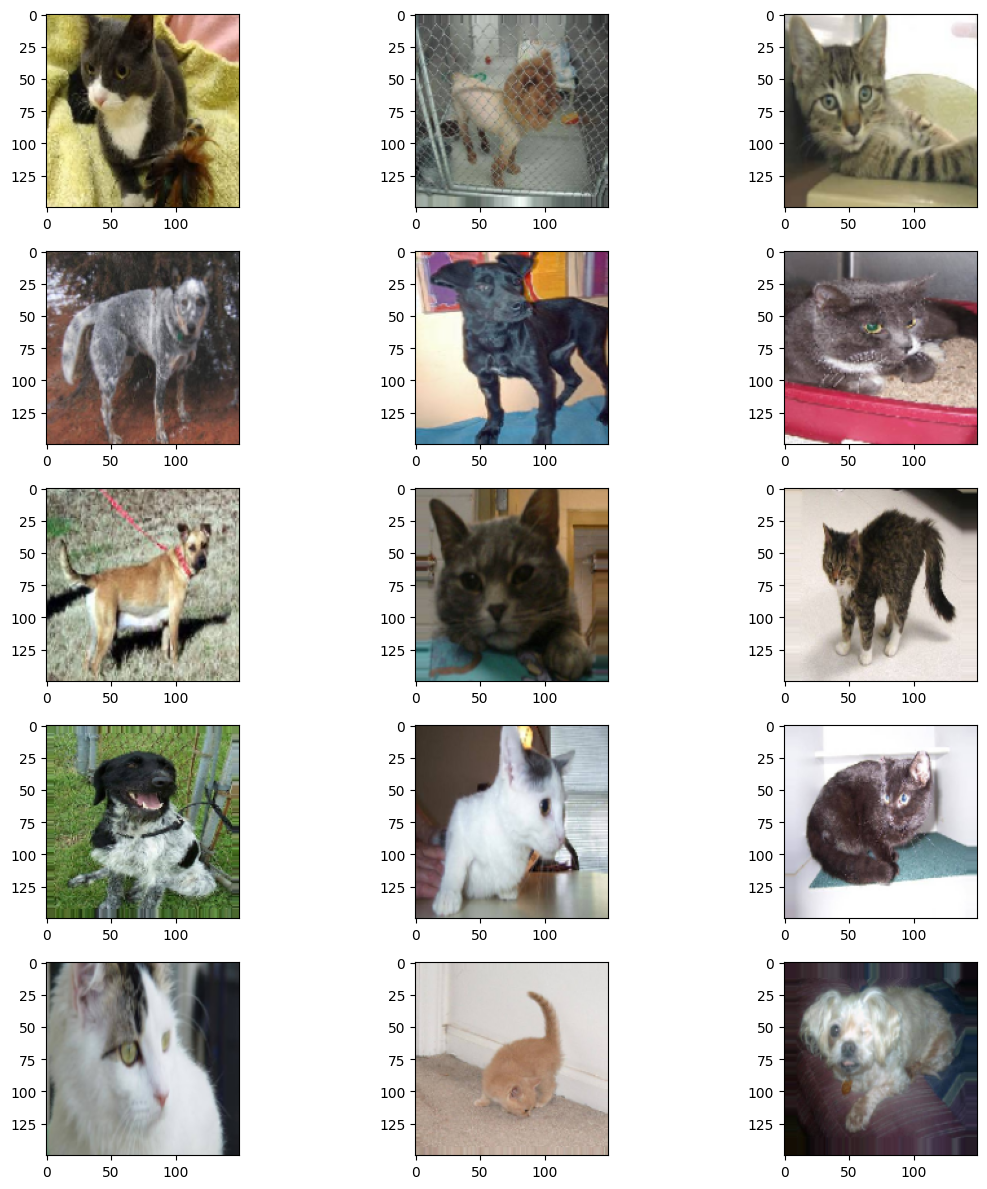

In [10]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for X_batch,Y_batch in train_generator:
    image=X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

##### **Building the CNN Model**
**Layers in CNN**:
  1. Convolutional Layer
  2. ReLU
  3. Pooling Layer
  4. Fully Connected layer(Dense)

In [11]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))  #64 Neurons using a 3x3 filters

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #Pooling reducing the size of the data

model.add(Flatten()) #Conversion of multi-dimensional array into 1D array
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dense(1)) #Output Layer
model.add(Activation('sigmoid'))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 148, 148, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 350464)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      22,429,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

##### **Model Compilation**

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 148, 148, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 350464)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      22,429,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

# Initialize EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',    # Monitor validation loss
                               patience=5,             # Number of epochs to wait for improvement
                               restore_best_weights=True)  # Restore the best weights after stopping

# Train the model with early stopping
history = model.fit(
    train_generator,                    # Training data generator
    steps_per_epoch=nb_train_samples,    # Number of steps per epoch
    epochs=25,                           # Total number of epochs
    batch_size=32,                       # Batch size
    validation_data=validation_generator,  # Validation data generator
    validation_steps=nb_validation_samples,  # Number of validation steps (optional)
    callbacks=[early_stopping]           # Add early stopping callback
)


Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.7062 - loss: 0.5618 - val_accuracy: 0.7100 - val_loss: 0.5634
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 963ms/step - accuracy: 0.7355 - loss: 0.5567

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.7354 - loss: 0.5568 - val_accuracy: 0.6522 - val_loss: 0.6280
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7557 - loss: 0.5300 - val_accuracy: 0.7020 - val_loss: 0.5848
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 97s 973ms/step - accuracy: 0.7286 - loss: 0.5211 - val_accuracy: 0.8696 - val_loss: 0.3724
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 210ms/step - accuracy: 0.7000 - loss: 0.5978 - val_accuracy: 0.7145 - val_loss: 0.5561
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 120s 962ms/step - accuracy: 0.7568 - loss: 0.5144 - val_accuracy: 0.8261 - val_loss: 0.5794
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.6973 - loss: 0.5682 - val_accuracy: 0.7135 - val_loss: 0.5774
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 96s 958ms/step - accuracy: 0.7371 - loss: 0.5424 - val_accuracy: 0.7826 - val_loss: 0.5610
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.7182 - loss: 0.5657 - val_accura

###### **Model Fitting**

In [13]:
training=model.fit(train_generator,steps_per_epoch=nb_train_samples,epochs=epochs,validation_data=validation_generator,validation_steps=nb_validation_samples)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.5317 - loss: 1.6974 - val_accuracy: 0.5985 - val_loss: 0.6630
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 98s 982ms/step - accuracy: 0.6350 - loss: 0.6604 - val_accuracy: 0.3043 - val_loss: 0.8327
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.6543 - loss: 0.6319 - val_accuracy: 0.6590 - val_loss: 0.6226
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 96s 960ms/step - accuracy: 0.6589 - loss: 0.6273 - val_accuracy: 0.7391 - val_loss: 0.4878
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 195ms/step - accuracy: 0.8500 - loss: 0.4570 - val_accuracy: 0.6330 - val_loss: 0.6370
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 154s 987ms/step - accuracy: 0.6986 - loss: 0.5815 - val_accuracy: 0.7391 - val_loss: 0.5042
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.6718 - loss: 0.6046 - val_accuracy: 0.6845 - val_loss: 0.6138
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.6774 - loss: 0.5964 - val_accuracy: 0.6522 - val_loss: 0.5589
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.6800 - loss: 0.6001 - val_accuracy: 0.6815 - val_loss: 0.5992
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6500 - loss: 0.6278 - val_accuracy

###### **Finding out Model Accuracy**

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


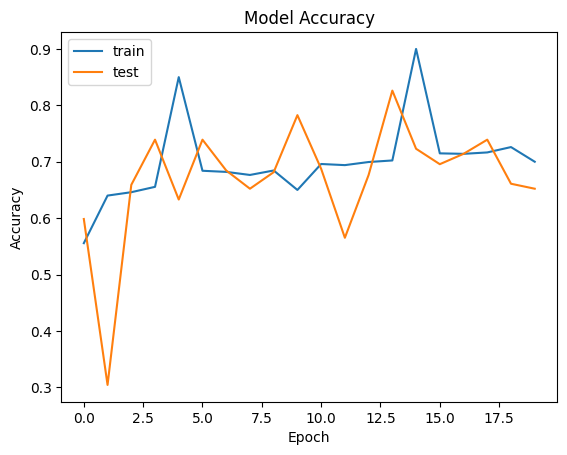

In [26]:
print(training.history.keys()) #listinng all the training data
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


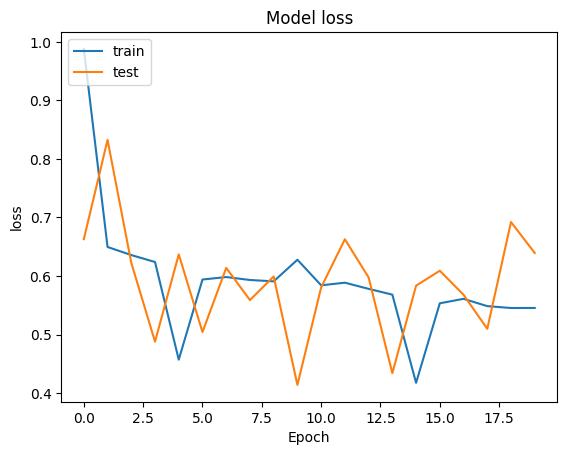

In [27]:
print(training.history.keys()) #listinng all the training data
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

##### **Image Prediction**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.]]
Prediction:  cat


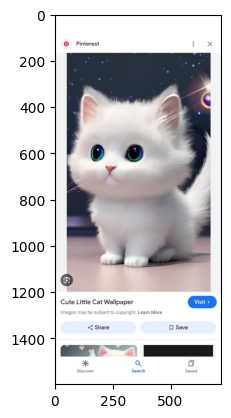

In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np
pred_image=image.load_img('/content/WhatsApp Image 2024-11-08 at 12.58.55_d8641a68.jpg',target_size=(150,150))

img_pred=image.img_to_array(pred_image)
img_pred=np.expand_dims(img_pred,axis=0)

result=model.predict(img_pred)
print(result)
if result[0][0]==1:
  prediction='dog'
else:
  prediction='cat'
print('Prediction: ',prediction)

img=npimg.imread('/content/WhatsApp Image 2024-11-08 at 12.58.55_d8641a68.jpg')
imgplot=plt.imshow(img)
plt.show()